In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")
df = transactions.merge(customers, on="CustomerID", how="left")
df = df.merge(products, on="ProductID", how="left")

In [3]:
df = df.rename(columns={"Price_x": "Price", "Price_y": "ProductPrice"})

In [4]:
cust_profiles = df.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price': 'mean',
    'Region': 'first',
    'Category': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'
}).reset_index()
cust_profiles = pd.get_dummies(cust_profiles, columns=['Region', 'Category'])

In [7]:
features = cust_profiles.drop(['CustomerID'], axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
db_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(features_scaled)
    dbi = davies_bouldin_score(features_scaled, clusters)
    db_scores.append(dbi)

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

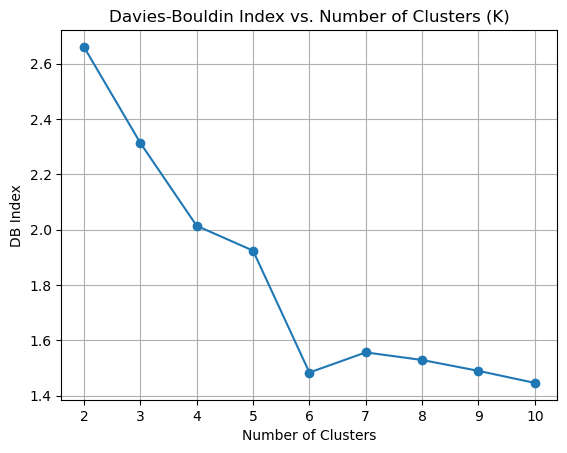

In [8]:
plt.plot(k_range, db_scores, marker='o')
plt.title('Davies-Bouldin Index vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')
plt.grid(True)
plt.show()

In [9]:
best_k = k_range[np.argmin(db_scores)]
print(f"Best K = {best_k} with DB Index = {min(db_scores):.4f}")

Best K = 10 with DB Index = 1.4455


In [10]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
cust_profiles['Cluster'] = kmeans.fit_predict(features_scaled)

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(features_scaled)

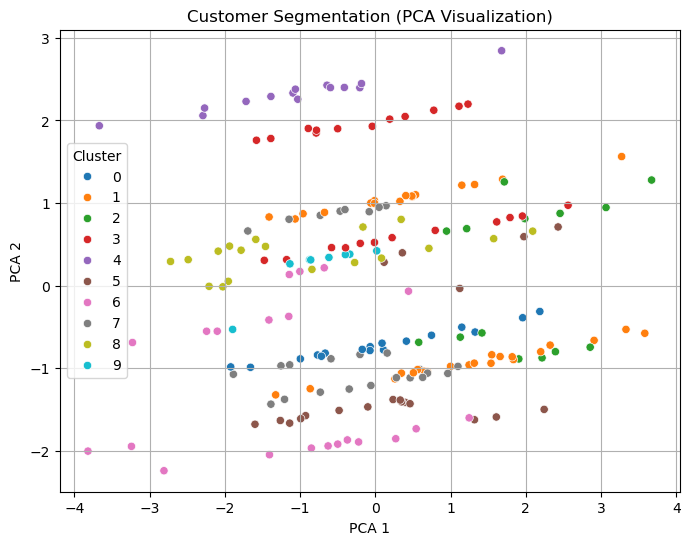

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced[:,0], y=reduced[:,1], hue=cust_profiles['Cluster'], palette='tab10')
plt.title('Customer Segmentation (PCA Visualization)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


In [13]:
cust_profiles.head()

,CustomerID,TotalValue,Quantity,Price,Region_Asia,Region_Europe,Region_North America,Region_South America,Category_Books,Category_Clothing,Category_Electronics,Category_Home Decor,Cluster
0,C0001,3354.52,12,278.334000,False,False,False,True,False,False,True,False,7
1,C0002,1862.74,10,208.920000,True,False,False,False,False,True,False,False,3
2,C0003,2725.38,14,195.707500,False,False,False,True,False,False,False,True,6
3,C0004,5354.88,23,240.636250,False,False,False,True,True,False,False,False,1
4,C0005,2034.24,7,291.603333,True,False,False,False,False,False,True,False,9
